<a href="https://colab.research.google.com/github/pradeepselva204/deep_learning/blob/master/Cuda_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numba import jit
import math

# This is the function decorator syntax and is equivalent to `hypot = jit(hypot)`.
# The Numba compiler is just a function you can call whenever you want!
@jit
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

In [0]:
hypot(3.0, 4.0)

5.0

In [0]:
hypot.py_func(3.0, 4.0)

5.0

In [0]:
%timeit hypot.py_func(3.0, 4.0)

The slowest run took 17.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 851 ns per loop


In [0]:
%timeit hypot(3.0, 4.0)

The slowest run took 37.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 254 ns per loop


In [0]:
%timeit math.hypot(3.0, 4.0)

The slowest run took 171.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 152 ns per loop


**                                                                To Test Numba Functionality**

In [0]:
nsamples = 1000000
# TODO: Import Numba's just-in-time compiler function
from numba import jit
import random

# TODO: Use the Numba compiler to compile this function
@jit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [0]:
# We will use numpy's `testing` library to confirm compiled and uncompiled versions run the same
from numpy import testing

# This assertion will fail until you successfully complete the exercise one cell above
testing.assert_almost_equal(monte_carlo_pi(nsamples), monte_carlo_pi.py_func(nsamples), decimal=2)

In [0]:
%timeit monte_carlo_pi(nsamples)

100 loops, best of 3: 13.3 ms per loop


In [0]:
%timeit monte_carlo_pi.py_func(nsamples)

1 loop, best of 3: 408 ms per loop


In [0]:
hypot.inspect_types()

In [0]:
# Checking if Numba can compile a dictionary

@jit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

'value'

In [0]:
@jit(nopython=True)
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: ignored

In [0]:
from numba import vectorize

@vectorize
def add_ten(num):
    return num + 120

In [0]:
import numpy as np
nums = np.arange(5)
add_ten(nums)

array([120, 121, 122, 123, 124])

In [0]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

np.add(a, b)


array([11, 22, 33, 44])

In [0]:
print(a)

[1 2 3 4]


In [0]:
print(b)

[10 20 30 40]


In [0]:
c = np.add(a,b)

In [0]:
print(c)

[11 22 33 44]


In [0]:
c = np.arange(4*4).reshape((4,4))
print('c:', c)

np.add(b, c)

c: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[10, 21, 32, 43],
       [14, 25, 36, 47],
       [18, 29, 40, 51],
       [22, 33, 44, 55]])

In [0]:
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [0]:
d = np.arange(4*4)
print(d)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [0]:
d.reshape(4,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [0]:
from numba import vectorize
@vectorize (['int64(int64, int64)'], target='cuda') # Type signature and target are required for the GPU
def add_ufunc(x, y):
    return x + y

In [0]:
add_ufunc(a, b)

CudaSupportError: ignored

In [0]:
from numba import vectorize

@vectorize
def add_ten(num):
    return num + 10 

In [0]:
nums = np.arange(10)
add_ten(nums)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

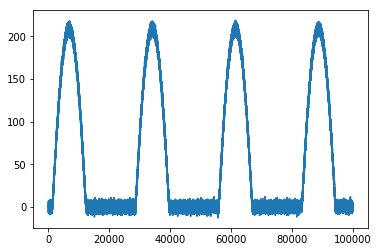

In [0]:
# This allows us to plot right here in the notebook
%matplotlib inline
import numpy as np
# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

In [0]:
from numba import vectorize
@vectorize
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        result = 0
    else:
        result = waveform_value
    return result

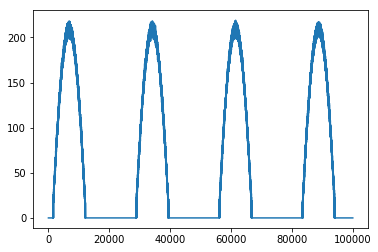

In [0]:
# This will throw an error until you successfully vectorize the `zero_suppress` function above.
# The noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15.0))

In [3]:
from numba import cuda
import numpy as np
n = 100000
x = np.arange(n).astype(np.float32)
y = 2 * x
x_device = cuda.to_device(x)
y_device = cuda.to_device(y)

print(x_device)
print(x_device.shape)
print(x_device.dtype)

CudaSupportError: ignored